In [1]:
import pandas as pd
import numpy as np
import itertools
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [2]:
def plot_confusion_matrix(cnf_matrix, classesNames, normalize=False,
                          cmap=plt.cm.Blues):
    """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
    """
    np.set_printoptions(precision=2)

    if normalize:
        soma = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / soma
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix, without normalization'

    print(cm)

    plt.figure()

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classesNames))
    plt.xticks(tick_marks, classesNames, rotation=45)
    plt.yticks(tick_marks, classesNames)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
train = pd.read_csv("./clean_data/clean_train.csv")
test = pd.read_csv("./clean_data/clean_test.csv")
test_class = test.iloc[:,:1]
test = test.iloc[:,1:]
X = train.iloc[:,1:]
y = train['class']
labels = pd.unique(y)

In [4]:
print(train.columns.values)
train.sample(5)
print(test.columns.values)
test.sample(5)

['class' 'aa_000' 'ab_000' 'ac_000' 'ad_000' 'ae_000' 'af_000' 'ag_000'
 'ag_001' 'ag_002' 'ag_003' 'ag_004' 'ag_005' 'ag_006' 'ag_007' 'ag_008'
 'ag_009' 'ah_000' 'ai_000' 'aj_000' 'ak_000' 'al_000' 'am_0' 'an_000'
 'ao_000' 'ap_000' 'aq_000' 'ar_000' 'as_000' 'at_000' 'au_000' 'av_000'
 'ax_000' 'ay_000' 'ay_001' 'ay_002' 'ay_003' 'ay_004' 'ay_005' 'ay_006'
 'ay_007' 'ay_008' 'ay_009' 'az_000' 'az_001' 'az_002' 'az_003' 'az_004'
 'az_005' 'az_006' 'az_007' 'az_008' 'az_009' 'ba_000' 'ba_001' 'ba_002'
 'ba_003' 'ba_004' 'ba_005' 'ba_006' 'ba_007' 'ba_008' 'ba_009' 'bb_000'
 'bc_000' 'bd_000' 'be_000' 'bf_000' 'bg_000' 'bh_000' 'bi_000' 'bj_000'
 'bk_000' 'bl_000' 'bm_000' 'bn_000' 'bo_000' 'bp_000' 'bq_000' 'br_000'
 'bs_000' 'bt_000' 'bu_000' 'bv_000' 'bx_000' 'by_000' 'bz_000' 'ca_000'
 'cb_000' 'cc_000' 'cd_000' 'ce_000' 'cf_000' 'cg_000' 'ch_000' 'ci_000'
 'cj_000' 'ck_000' 'cl_000' 'cm_000' 'cn_000' 'cn_001' 'cn_002' 'cn_003'
 'cn_004' 'cn_005' 'cn_006' 'cn_007' 'cn_008' 'cn_009'

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
4025,234.0,0.000000,2.130706e+09,26.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,...,1260.0,256.0,668.0,1614.0,3946.0,1598.0,0.0,0.0,0.000000,0.000000
14530,30.0,0.772065,2.130706e+09,14.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,...,488.0,148.0,70.0,46.0,0.0,0.0,0.0,0.0,0.000000,0.000000
11041,39276.0,0.772065,5.000000e+01,86.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,...,350128.0,215264.0,547654.0,427514.0,234230.0,71718.0,21452.0,390.0,0.000000,0.000000
10635,0.0,0.772065,3.580393e+08,1100.000000,6.428347,10.19595,0.0,0.0,0.0,0.0,...,551296.0,293468.0,1019860.0,1057906.0,18540.0,3222.0,2220.0,0.0,0.064969,0.242683
853,920060.0,0.772065,3.580393e+08,439.498794,6.428347,10.19595,0.0,0.0,0.0,15794.0,...,10891026.0,5154542.0,9226426.0,6185862.0,4028634.0,2230756.0,3233782.0,249416.0,0.064969,0.242683


## Logistic Regression

In [5]:
logreg = LogisticRegression()
logreg.fit(X,y)
logreg.predict(X)

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array(['neg', 'neg', 'neg', ..., 'neg', 'neg', 'neg'], dtype=object)

In [6]:
y_pred=logreg.predict(X)
len(y_pred)

60000

In [7]:
print(metrics.accuracy_score(y,y_pred))

0.9917166666666667


## KNN (K=5)

In [8]:
knn = KNeighborsClassifier(n_neighbors=2)
model = knn.fit(X, y)
y_pred = model.predict(X)
print(metrics.accuracy_score(y,y_pred))


0.9928166666666667


## Evaluation procedure 2 - Train/test split

In [9]:
trX, trY, tsX, tsY = X, y, test, test_class

In [10]:
print(X.shape)
print(y.shape)

(60000, 170)
(60000,)


In [11]:
print(X.shape)
print(test.shape)

(60000, 170)
(16000, 170)


In [12]:
#knn = KNeighborsClassifier(n_neighbors=3)
#model = knn.fit(trX, trY)
#predY = model.predict(tsX)
#cnf_matrix = confusion_matrix(tsY, y_pred, labels)
#plot_confusion_matrix(cnf_matrix, labels)

In [13]:
logreg=LogisticRegression()
logreg.fit(trX, trY)

c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_pred = logreg.predict(tsX)
print(metrics.accuracy_score(tsY, y_pred))

0.9885


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(trX, trY)
y_pred = knn.predict(tsX)
print(metrics.accuracy_score(tsY, y_pred))

0.983875


In [16]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(trX, trY)
y_pred = knn.predict(tsX)
print(metrics.accuracy_score(tsY, y_pred))

0.9851875


In [16]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(trX, trY)
    y_pred = knn.predict(tsX)
    scores.append(metrics.accuracy_score(tsY, y_pred))

print(scores)


[0.9851875, 0.983, 0.984125, 0.9830625, 0.983875, 0.9815, 0.9831875, 0.9820625, 0.9829375, 0.9823125, 0.983, 0.9825625, 0.9835, 0.98325, 0.9834375, 0.9821875, 0.98275, 0.9818125, 0.9821875, 0.98125, 0.98175, 0.9811875, 0.98175, 0.9813125, 0.9815625]


Text(0, 0.5, 'Testing Accuracy')

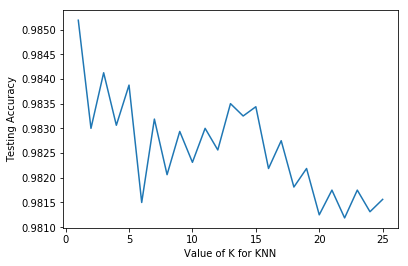

In [17]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

## Naive Bayes Classifier

In [18]:
data = pd.read_csv("./clean_data/clean_train.csv")
data1 = pd.read_csv("./clean_data/clean_test.csv")

In [19]:
X_train, X_test = data, data1
used_features = X_train.iloc[:,1:]
abc= X_test.iloc[:,1:]
gnb = GaussianNB()
print(  used_features.values)
gnb.fit(
    used_features.values,
    X_train["class"]
)
y_pred = gnb.predict(abc)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["class"] != y_pred).sum(),
          100*(1-(X_test["class"] != y_pred).sum()/X_test.shape[0])
))


[[7.66980000e+04 7.13188501e-01 2.13070644e+09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.30580000e+04 7.13188501e-01 0.00000000e+00 ... 1.50000000e+03
  0.00000000e+00 0.00000000e+00]
 [4.10400000e+04 7.13188501e-01 2.28000000e+02 ... 5.14000000e+02
  0.00000000e+00 0.00000000e+00]
 ...
 [1.12000000e+02 0.00000000e+00 2.13070643e+09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.02920000e+04 7.13188501e-01 2.13070643e+09 ... 3.88422000e+05
  0.00000000e+00 0.00000000e+00]
 [4.02220000e+04 7.13188501e-01 6.98000000e+02 ... 1.58000000e+02
  0.00000000e+00 0.00000000e+00]]
Number of mislabeled points out of a total 16000 points : 502, performance 96.86%


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics

data = pd.read_csv("./clean_data/clean_train.csv")

X = data.iloc[:, 1:]
Y = data['class']

scores = []

#green.head()

print("Train set dimensions : {}".format(data.shape))

data.groupby('class').size()

#Visualization of data
#green.groupby('consensus').hist(figsize=(14, 14))

data.isnull().sum()
data.isna().sum()

dataframe = pd.DataFrame(Y)
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 44)


#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting the Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))

#95.8 Acuracy

#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#95.1 Acuracy

#Fitting SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train) 
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#97.2 Acuracy

#Fitting K-SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#96.5 Acuracy

#Fitting Naive_Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#91.6 Acuracy

#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#95.8 Acuracy

#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#98.6 Acuracy

#predicting the Test set results
Y_pred = classifier.predict(X_test)

#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(Y_test, Y_pred)
#c = print(cm[0, 0] + cm[1, 1])
print(scores)

Train set dimensions : (60000, 171)


c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.9929166666666667, 0.99175, 0.9929166666666667, 0.9888333333333333, 0.9636666666666667, 0.9898333333333333, 0.9935833333333334]


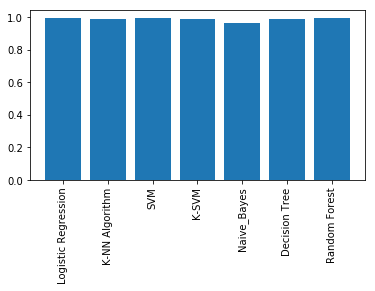

In [21]:
bars = ('Logistic Regression', 'K-NN Algorithm', 'SVM', 'K-SVM', 'Naive_Bayes','Decision Tree','Random Forest')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, scores)
 
# Create names on the x-axis
#plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
 
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)

plt.style.use('bmh')
    
# Show graphic
plt.show()

In [23]:
from imblearn.over_sampling import SMOTE
 
smote = SMOTE(kind = "regular")
X_sm, y_sm = smote.fit_sample(X_train, Y_train)

In [24]:
X = X_sm
Y = y_sm

scores = []

#green.head()

print("Train set dimensions : {}".format(data.shape))

data.groupby('class').size()

#Visualization of data
#green.groupby('consensus').hist(figsize=(14, 14))

data.isnull().sum()
data.isna().sum()

dataframe = pd.DataFrame(Y)
#Encoding categorical data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 44)


#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting the Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))

#95.8 Acuracy

#Fitting K-NN Algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#95.1 Acuracy

#Fitting SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train) 
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#97.2 Acuracy

#Fitting K-SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#96.5 Acuracy

#Fitting Naive_Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#91.6 Acuracy

#Fitting Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#95.8 Acuracy

#Fitting Random Forest Classification Algorithm
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)
scores.append(metrics.accuracy_score(Y_test, y_pred))
#98.6 Acuracy

#predicting the Test set results
Y_pred = classifier.predict(X_test)

#Creating the confusion Matrix
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(Y_test, Y_pred)
#c = print(cm[0, 0] + cm[1, 1])
print(scores)

Train set dimensions : (60000, 171)


c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\users\inesm\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.9606399321926153, 0.994437675478095, 0.9659373841182392, 0.9751549504688245, 0.9163532340944006, 0.9916830004767707, 0.9960798855750385]


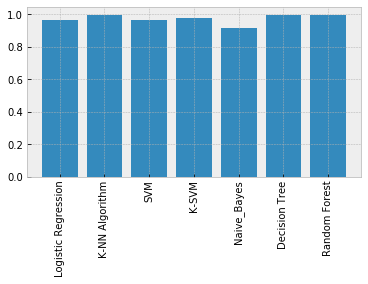

In [25]:
bars = ('Logistic Regression', 'K-NN Algorithm', 'SVM', 'K-SVM', 'Naive_Bayes','Decision Tree','Random Forest')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, scores)
 
# Create names on the x-axis
#plt.xticks(y_pos, bars, color='black')
plt.yticks(color='black')
 
# Rotation of the bars names
plt.xticks(y_pos, bars, rotation=90)
 
# Custom the subplot layout
plt.subplots_adjust(bottom=0.4, top=0.99)

plt.style.use('bmh')
    
# Show graphic
plt.show()